In [1]:
import numpy as np
cm = np.load('/home/miguel/msc-tesis/ssl_satellital/exp_35/results/NWPU-RESISC45/stats/conf/exp_35_cm_00_00_InceptionV3.npy')
cm

array([[0.73, 0.03, 0.  , ..., 0.  , 0.01, 0.  ],
       [0.01, 0.64, 0.  , ..., 0.01, 0.01, 0.  ],
       [0.  , 0.  , 0.76, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.82, 0.  , 0.01],
       [0.01, 0.01, 0.  , ..., 0.  , 0.76, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.75]])

In [30]:
import pandas as pd
df_cm = pd.read_pickle('/home/miguel/msc-tesis/ssl_satellital/exp_37/results/ucmerced/stats/conf/exp_75_cm_00_00_co-train.pkl')
df_cm

,cm,classnames
0,"[[19, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...","[agricultural, airplane, baseballdiamond, beac..."


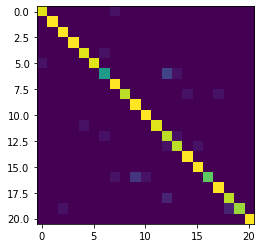

In [25]:
import matplotlib.pyplot as plt
plt.imshow(cm["cm"][0], interpolation='nearest')
plt.savefig("test.svg", format="svg")
plt.show()

In [31]:
cm = df_cm["cm"][0]
#Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = np.round(cm, 2)
cm

array([[0.95, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.95, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , 0.  , 0.  , 0.95, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.69, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.25, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],

In [34]:
import plotly.express as px
fig = px.imshow(cm,
                labels=dict(x="Predicted Class", y="True Class", color="Probability (%)"),
                #x=labels,
                #y=labels,
                #color_continuous_scale=px.colors.sequential.Blues
            )

fig.update_layout(autosize=True, margin={'l': 0, 'r': 0, 't': 20, 'b': 0})
fig.write_image('cm_demo.png', scale=2)
fig.show()

In [36]:
fig.write_image("fig1.pdf")

In [11]:
#fig.write_image("fig1.svg")

fig.write_image("fig2.png", format="png", scale=3)

In [14]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("test.svg", format="svg")
    plt.show()

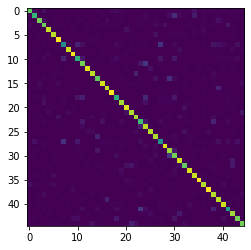

In [20]:
# import matplotlib.pyplot as plt
# plt.imshow(cm, interpolation='nearest')
# plt.savefig("test.svg", format="svg")
# plt.show()

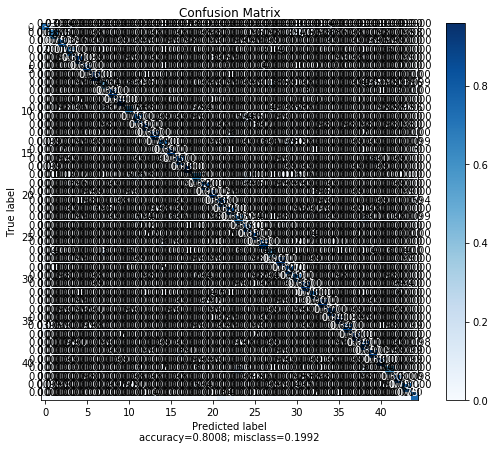

In [17]:
plot_confusion_matrix(cm, normalize = True,
                      target_names = None,
                      title        = "Confusion Matrix")

In [8]:
import numpy as np
import plotly.graph_objs as go
matrix = np.random.randn(10, 10)
ticks = ["tick %i" % i for i in range(10)]
trace = go.Heatmap(z=matrix,
                   x=ticks,
                   y=ticks,
                   colorscale='Viridis',
                   showscale=False)

layout = dict(xaxis_showgrid=False,
              xaxis_zeroline=False,
              xaxis_showticklabels=False,
              yaxis_showgrid=False, 
              yaxis_zeroline=False,
              yaxis_showticklabels=False)

fig = go.Figure(data=trace, layout=layout)
fig.show()